# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем данные в датасет

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
try:
    data = pd.read_csv('C:/Users/almuc/Downloads/real_estate_data.csv', sep= '\t', parse_dates=['first_day_exposition'], dayfirst=True)
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep= '\t', parse_dates=['first_day_exposition'], dayfirst=True)

Изучаем общую информацию о полученных данных

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

В таблице для анализа 22 столбца и 23699 строк.

Строим гистограммы

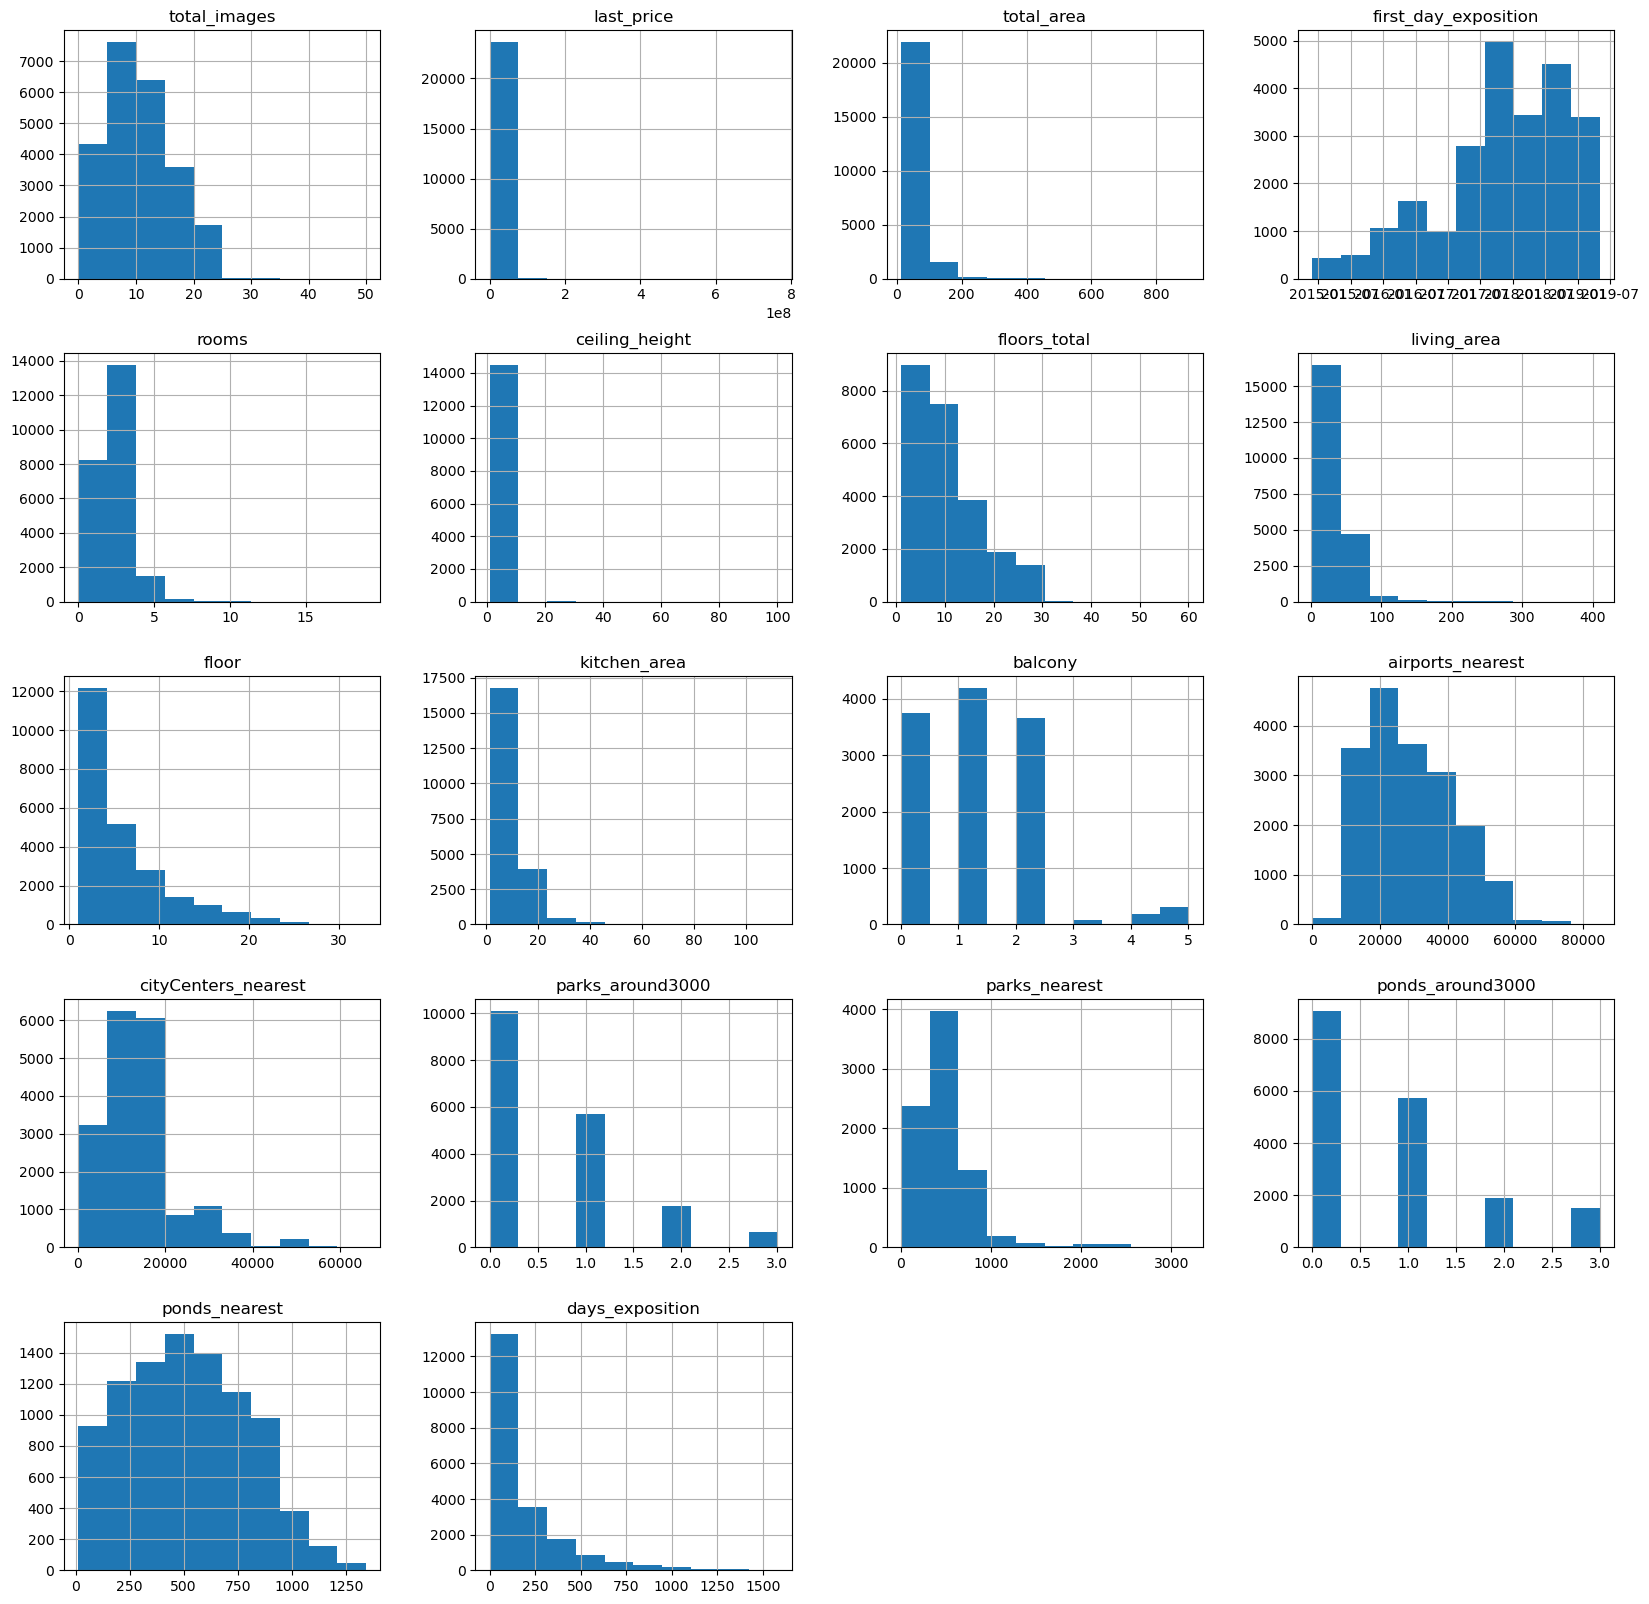

In [5]:
data.hist(figsize=(20, 20));

Построим таблицу со статистическими значениями.

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Здесь мы видим значения которые выбиваются из межквартильных размахов, следовательно нужно будет провести работу с выбросами данных.

### Предобработка данных

Выведем на экран название всех столбцов

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Как мы видим столбец расстояние до центра города 'cityCenters_nearest' не соответвует змеиному регистру. поэтому переименуем столбец.

In [8]:
data.rename(columns={'cityCenters_nearest' : 'city_centers_nearest'}, inplace=True)

**Считаем количество пропущенных значений**

In [9]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.800000
floors_total,0.400000
living_area,8.000000
floor,0.000000
is_apartment,88.300000


**Определяем, в каких столбцах есть пропуски.**\
Количество обнаруженных пропусков в строках 23699. Пропуски обнаружены в следующих столбцах:

9195 пропусков в ceiling_height - практически треть не заполнили высоту потоков, оставим Null,

86 пропусков floors_total - данные просто не заполнили, оудалим пропуски,

1903 пропуска в living_area - оставим Null,

20924 пропуска в is_apartment - можем предположить что это не апартаменты и присвоить False,

2278 пропусков в kitchen_area - нужно проверить студия это или нет, если нет оставим Null,

11519 пропусков в balcony - скорее всего там нет балконов, поэтому поставим 0,

49 пропусков в locality_name - данные просто не заполнили, удалим пропуски,

5542 пропуска в airports_nearest - аэропортов рядом нет, оставляем Null,

5519 пропусков в city_centers_nearest - до центра города далеко, оставляем Null, 

5518 пропусков в parks_around3000 - парков в радиусе 3км нет, оставляем Null,

15620 пропусков в parks_nearest - оставим Null,

5518 пропусков в ponds_around3000 - прудов в радиусе 3км нет, оставляем Null,

14589 пропусков в ponds_nearest - оставим Null,

3181 пропуск в days_exposition - объявление не было опубликовано, оставляем Null.

Так как, небольшое значение пропусков в названии населенного пункта и в количестве этажей в доме, и мы не можем предположить эти данные, или взять средние данные, то строки с пропусками в столбцах locality_name и floors_total следует удалить.

In [11]:
data = data.dropna(subset=['locality_name'])

In [12]:
data = data.dropna(subset=['floors_total'])

Заполняем пропуски в столбце is_apartment (аппартаменты) как False

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False) 

Заполняем пропуски в столбце balcony (балконы) как 0

In [14]:
data['balcony'] = data['balcony'].fillna(0) 

In [15]:
data['days_exposition'] = data['days_exposition'].fillna(0) 

Проверяем типы данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Необходимо сменить следующие типы данных:**
1. last_price - int64
2. first_day_exposition - date
3. floors_total - int64
4. balcony - int64
5. days_exposition - int64\
Изменение типа first_day_exposition необходимо, т.к. при приведении даты к единому формату позволит работать с датой более быстрее и правильнее.\
Остальные данные стоит привести к целым числам, т.к не бывет 1,5 балкона или 10,5 этажей, и. т.п.

In [17]:
data['last_price'] = data['last_price'].astype('int64')

In [18]:
data['floors_total'] =  data['floors_total'].astype('int64')

In [19]:
data['balcony'] = data['balcony'].astype('int64')

In [20]:
data['days_exposition'] = data['days_exposition'].astype('int64')

Проверяем полученные данные

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

**Проверка дубликатов в названиях населенных пунктов**

In [22]:
data['locality_name'].unique().shape[0]

364

In [23]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Первое что мы должны сделать это привести все названия населенных пунктов к нижнему регистру

In [24]:
data['locality_name'] = data['locality_name'].str.lower()

Затем стоит убрать букву "ё" и заменить  "городской поселок" на "поселок городского типа"

In [25]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е').replace(['городской поселок'], 'поселок городского типа', regex=True)

Проверяем, что в итоге получилось:

In [26]:
def row():
    return print('Количество уникальных значений locality_name:', data['locality_name'].unique().shape[0])
row()

Количество уникальных значений locality_name: 323


Повторно проверяем наличие явных дубликатов

In [27]:
print('Количество явных дубликатов', data.duplicated().sum())

Количество явных дубликатов 0


**После обработки явных дубликатов, стоит задуматься над выбросами в данных.**

In [28]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,156.420115
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,213.517293
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,22.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,73.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,198.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


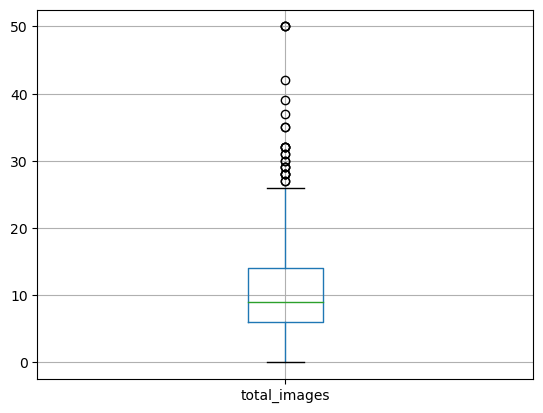

In [29]:
data.boxplot('total_images')
plt.show()

Столбец total_images выглядит не плохо, думаю стоит оставить как есть

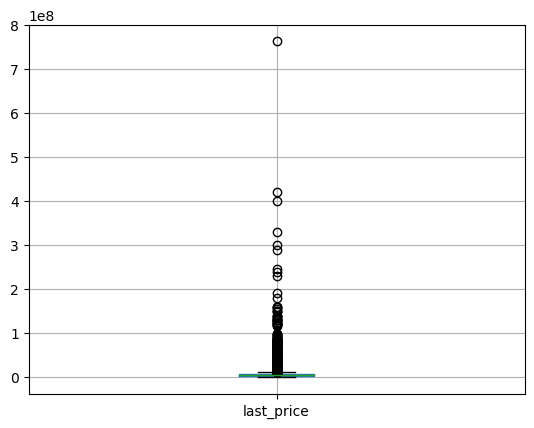

In [30]:
data.boxplot('last_price')
plt.show()

Следующий столбец last_price имеет большой разбег, есть квартиры стоимостью 12 тыс. руб., что на мой взгляд является явной опечаткой, поэтому минимальную стоимость квартиры возьмем от 400 тыс. руб. В то же время имеется квартира стоимостью более 763 млн. руб. Такие квартиры бывают, но уже продаются совершенно в другом сегменте. Поэтому квартиры стоимостью более 100 млн. руб мы учитывать не будем. Для начала посчитаем количество квартир вне определенного диапазона цен.

In [31]:
print('Квартир стоимостью меньше 400.000:', data.query('last_price < 400000')['last_price'].count())
print('Квартир стоимостью больше 100.000.000:', data.query('last_price > 100000000')['last_price'].count())

Квартир стоимостью меньше 400.000: 1
Квартир стоимостью больше 100.000.000: 37


Теперь удалим квартиры стоимостью меньше 400 тыс. руб. и больше 100 млн руб.

In [32]:
data.drop(index=data.query('last_price < 400000').index,inplace=True)
data.drop(index=data.query('last_price > 100000000').index,inplace=True)

Для нашего анализа наиболее интересны квартиры стоимостью от 400 тыс. руб до 30 млн. Поэтому построим гистограммы.

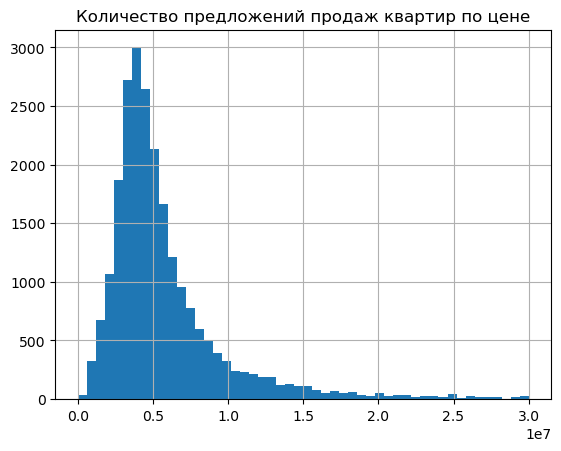

In [33]:
data['last_price'].hist(bins=50, range=(0,3e+07));
plt.title("Количество предложений продаж квартир по цене")
plt.show()

По графику видно, что наибольшее количество крартир продается в ценовом сегменте от 2,5 до 7,5 млн руб.

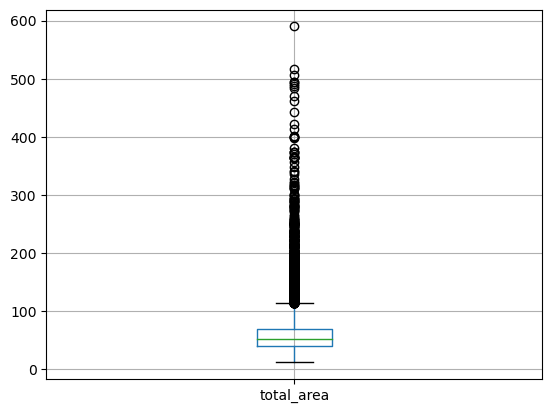

In [34]:
data.boxplot('total_area')
plt.show()

Следующий столбец total_area, по нему мы видем что минимальная квартира имеет площадь 12 кв. метров. Вероятно это комната. А вот максимальная площадь квартиры 900 кв. метров.
Посчитаем количество квартир до 10 (для проверки) и более 400 кв. метров.

In [35]:
print('Квартир с площадью меньше 10 кв. метров:', data.query('total_area < 10')['total_area'].count(), 'шт')
print('Квартир с площадью больше 400 кв. метров:', data.query('total_area > 400')['total_area'].count(), 'шт')

Квартир с площадью меньше 10 кв. метров: 0 шт
Квартир с площадью больше 400 кв. метров: 14 шт


Удаляем квартиры площадью более 400 кв. метров и строим гистограммы

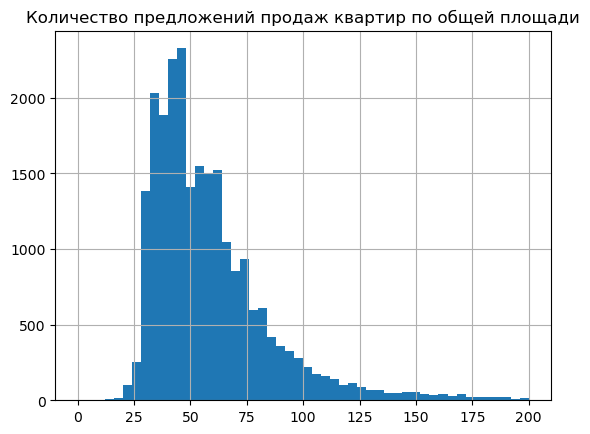

In [36]:
data.drop(index=data.query('total_area > 400').index,inplace=True)
data.hist('total_area', bins=50, range=(0,200));
plt.title("Количество предложений продаж квартир по общей площади")
plt.show()

По графику видно, что наибольшее количество предложений на рынке это квартиры площадью от 27 до 60 кв. метров. Что я считаю не удивительно, т.к. наибольшее количество объявлений в одно и двухкомнатных квартирах

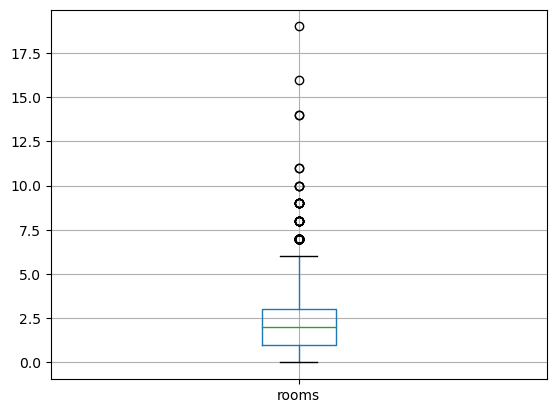

In [37]:
data.boxplot('rooms')
plt.show()

Стоблей rooms имеет нулевые значения. Не стоит забывать, что сейчас строят "Студии", а также есть квартиры со свободной планировкой, в которой не указывается количество комнат. Максимальное значение же составляет 19 комнат, наверное это тоже из разряда элитное жилье, поэтому квартиры с площадью более 7 комнат стоит удалить.

In [38]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

print('Квартиры без комнат: студии:',data.query('rooms == 0 and studio')['rooms'].count()) 

print('Квартиры без комнат: апартаменты:',data.query('rooms == 0 and is_apartment')['rooms'].count()) 

print('Квартиры без комнат: свободная планировка:',data.query('rooms == 0 and open_plan')['rooms'].count())

print('Квартиры без комнат: не апартаменты и не свободная планировка:',data.query('rooms == 0 and ~studio and ~open_plan')['rooms'].count())

data.drop(index=data.query('rooms > 7').index,inplace=True)

Квартиры без комнат: 194
Квартиры без комнат: студии: 135
Квартиры без комнат: апартаменты: 0
Квартиры без комнат: свободная планировка: 59
Квартиры без комнат: не апартаменты и не свободная планировка: 0


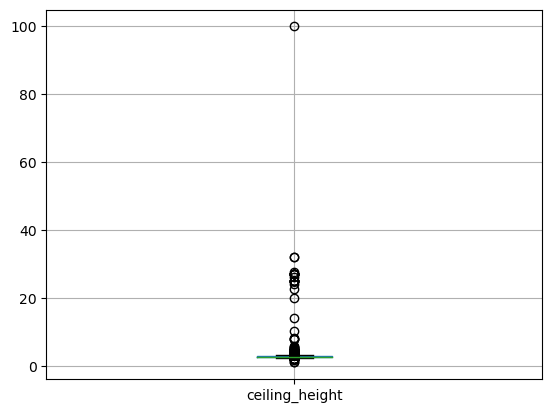

In [39]:
data.boxplot('ceiling_height')
plt.show()

Столбец ceiling_height - высота потолков. Мы видим минимальное значение 1 м., что в принципе не возможно, т.к. данный параметр регламентируется СНиПом в котором указывает, что минимальная высота потолков должна быть 2,5 метра. На рынке имеется предложение 2-х этажных пентхаусов, где высота потолка может достигать 5 метров. Еще можно предположить, что произошла опечатка при заполнении данных и потолки от 25 до 36 метров не была проставлена запятая. Все потолки с высотой более 36 метров будем считать выбросами и удалим, самая максимальная высота квартиры 100 м, что в принципе невозможно.

In [40]:
print('Квартир с потолками до 2,5м: ', data.query('ceiling_height < 2.5')['ceiling_height'].count())

print('Квартир с потолками от 4 до 5м: ', data.query('ceiling_height > 4 and ceiling_height <= 5')['ceiling_height'].count())

print('Квартир с потолками от 5 до 25м: ', data.query('ceiling_height > 5 and ceiling_height < 25')['ceiling_height'].count())

print('Квартир с потолками от 25м до 36м: ', data.query('ceiling_height >= 25 and ceiling_height <= 36')['ceiling_height'].count())

print('Квартир с потолками от 37м: ', data.query('ceiling_height >= 37')['ceiling_height'].count())

Квартир с потолками до 2,5м:  73
Квартир с потолками от 4 до 5м:  34
Квартир с потолками от 5 до 25м:  14
Квартир с потолками от 25м до 36м:  19
Квартир с потолками от 37м:  1


Квартиры с высотой потолков менее 2.5м, не по СНиПу. Также не сильно повлияю на выборку квартиры с потолками от 4 до 25 м, а также необходимо удалить квартиру с высотой потолков выше 37 м. Поэтому удаляем выбросы

In [41]:
data.drop(index=data.query('ceiling_height < 2.5').index,inplace=True)
data.drop(index=data.query('ceiling_height > 36').index,inplace=True)
data.drop(index=data.query('ceiling_height > 4 and ceiling_height < 25').index,inplace=True)

Для квартир с высотой потолков до 25 до 36 метров предполагаем, что это опечатка и делим на 10, получая 2.5 и 3.6 метра.

In [42]:
data.update(data[(data['ceiling_height'] >= 25) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

Мы достаточно удалили, проверяем что получилось в конечных данных.

In [43]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23364.000000,2.336400e+04,23364.000000,23364.000000,14304.000000,23364.000000,21520.000000,23364.000000,21169.000000,23364.000000,17880.000000,17900.000000,17901.000000,7916.000000,17901.000000,8932.000000,23364.000000
mean,9.872625,6.181068e+06,59.349512,2.053287,2.720593,10.707156,33.921529,5.886963,10.486023,0.593948,28819.920749,14243.201341,0.606279,490.960081,0.765544,519.376399,155.936398
std,5.675607,6.176478e+06,30.758233,1.025102,0.254626,6.600389,19.687733,4.877827,5.639680,0.960255,12658.274580,8605.109255,0.797939,342.699870,0.935787,278.191943,212.942820
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18539.000000,9340.250000,0.000000,288.000000,0.000000,295.000000,22.000000
50%,9.000000,4.600000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26794.500000,13138.000000,0.000000,454.000000,0.000000,503.000000,73.000000
75%,14.000000,6.700000e+06,69.192500,3.000000,2.800000,16.000000,42.100000,8.000000,12.000000,1.000000,37322.750000,16296.000000,1.000000,613.000000,1.000000,733.000000,197.000000
max,50.000000,9.900000e+07,400.000000,7.000000,4.000000,60.000000,255.700000,33.000000,107.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Как мы видим, удаление произведено недостаточно, поэтому продолжим предобработку данных

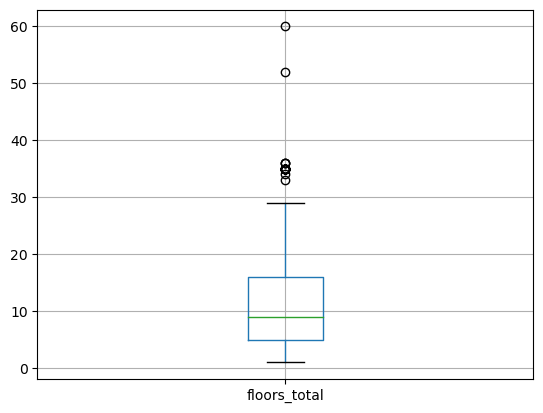

In [44]:
data.boxplot('floors_total')
plt.show()

Столбец floors_total - есть одноэтажные квартиры,но это не похоже на выброс. Так же есть небольшое количество квартир в 30 и более этажных домах.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23364 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23364 non-null  int64         
 1   last_price            23364 non-null  int64         
 2   total_area            23364 non-null  float64       
 3   first_day_exposition  23364 non-null  datetime64[ns]
 4   rooms                 23364 non-null  int64         
 5   ceiling_height        14304 non-null  float64       
 6   floors_total          23364 non-null  int64         
 7   living_area           21520 non-null  float64       
 8   floor                 23364 non-null  int64         
 9   is_apartment          23364 non-null  bool          
 10  studio                23364 non-null  bool          
 11  open_plan             23364 non-null  bool          
 12  kitchen_area          21169 non-null  float64       
 13  balcony         

In [46]:
print('Квартиры без комнат:',data.query('rooms == 0')['rooms'].count())

Квартиры без комнат: 193


In [47]:
print('Квартир в одноэтажных домах : ',data.query('floors_total == 1')['floors_total'].count())
print('Квартир в 30+ этажных домах : ',data.query('floors_total > 30')['floors_total'].count())

Квартир в одноэтажных домах :  23
Квартир в 30+ этажных домах :  31


Имеет смысл удалить квартиры в высотных зданиях, т.к. цена, площадь на многих из них будут относится к элитному жилью, которое мы уже удаляли и при дальнейшей обработки данных останется очень мало таких квартир. на общем фоне такие квартиры будут выглядить как выбросы.

In [48]:
data.drop(index=data.query('floors_total > 30').index,inplace=True)

**Строим гистограмму по этажам**

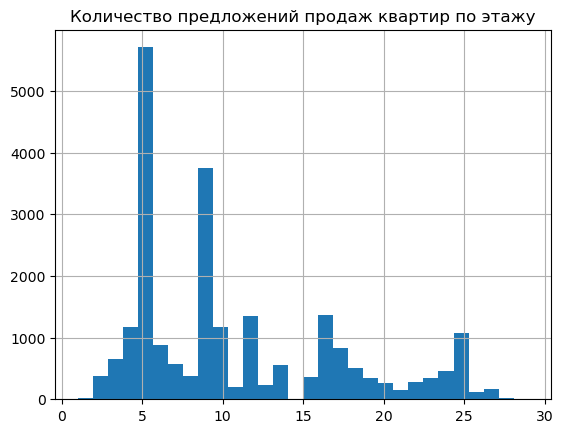

In [49]:
data['floors_total'].hist(bins=30);
plt.title("Количество предложений продаж квартир по этажу")
plt.show()

Как мы видим, наибольшее количество предложений это пяти и девятиэтажные здания.

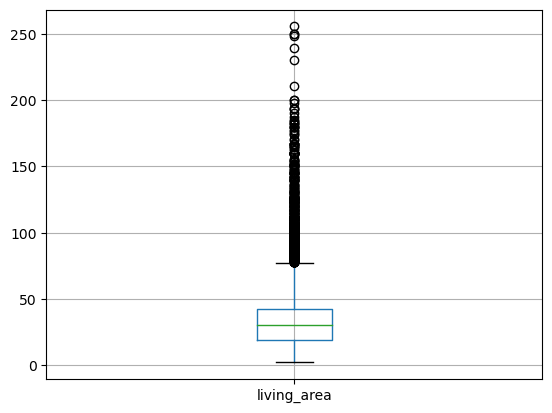

In [50]:
data.boxplot('living_area')
plt.show()

Столбец living_area - наибольшое количество квартир с жилой площадью от 10 до 60 кв.м.
Здесь интерсуют квартиры с жилой площадью меньше 10 кв.м. их 25!
Также нужно проверить были ли квартиры с жилой площадью больше обще площади квартиры.
Даже есть квартиры с жилой площадью 2 кв.м.
Удалим выбросы с жилой площадью меньше 10кв.м.
также отбросим квартиры с площадью более 200 кв.м.

In [51]:
print('Квартиры с жилой площадью меньше 10 кв.м.: ',data.query('living_area < 10')['living_area'].count())
print('Квартиры с жилой площадью больше общей: ',data.query('living_area > total_area')['living_area'].count())
print('Квартиры с жилой площадью больше 200: ',data.query('living_area > 200')['living_area'].count())

data.drop(index=data.query('living_area < 10').index,inplace=True)
data.drop(index=data.query('living_area > 200').index,inplace=True)

Квартиры с жилой площадью меньше 10 кв.м.:  25
Квартиры с жилой площадью больше общей:  0
Квартиры с жилой площадью больше 200:  7


**Строим гистограммы**

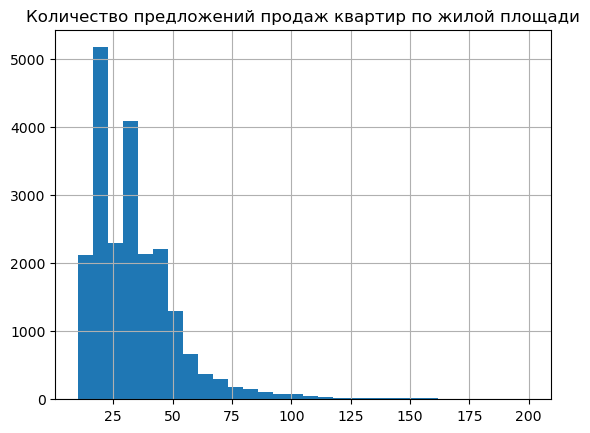

In [52]:
data['living_area'].hist(bins=30);
plt.title("Количество предложений продаж квартир по жилой площади")
plt.show()

Строим гистограмму по столбцу floor

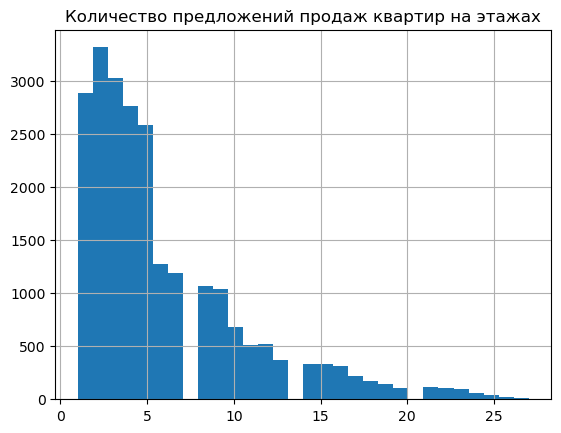

In [53]:
data['floor'].hist(bins=30);
plt.title("Количество предложений продаж квартир на этажах")
plt.show()

Интересный факт, на рынке практически нет квартир на 7, 13 и 21 этажах.

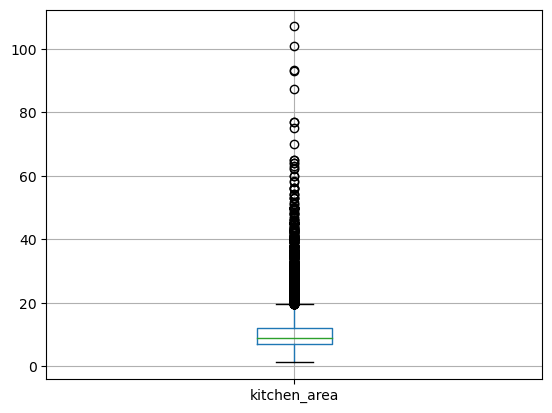

In [54]:
data.boxplot('kitchen_area')
plt.show()

Столбец kitchen_area - площадь кухни. Одна квартира с площадью кухни меньше 1 кв. метра это наверное аномалия.
Немало кухонь с площадью 5 кв.м. Кухонь с площадью более 30 кв.м. довольно мало.
Поэтому мы удалим строки с кухнями менее 2 кв.м. и больше 50 кв.м.

In [55]:
print('Площадь кухни меньше 2 кв.м.: ',data.query('kitchen_area < 2')['living_area'].count())
print('Площадь кухни 5 кв.м.: ',data.query('kitchen_area == 5')['living_area'].count())
print('Площадь кухни больше 50 кв.м.: ',data.query('kitchen_area > 50')['living_area'].count())
print('Площадь кухни больше общей: ',data.query('kitchen_area > total_area')['living_area'].count())

data.drop(index=data.query('kitchen_area < 2').index,inplace=True)
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)

Площадь кухни меньше 2 кв.м.:  1
Площадь кухни 5 кв.м.:  350
Площадь кухни больше 50 кв.м.:  33
Площадь кухни больше общей:  0


Строим гистограмму по столбцу kitchen_area.

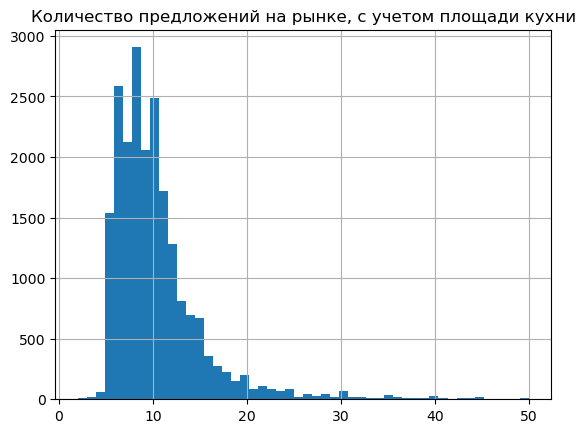

In [56]:
data['kitchen_area'].hist(bins=50, range=(2,50));
plt.title("Количество предложений на рынке, с учетом площади кухни")
plt.show()

Наибольшее количество квартир с кухнями от 7 до 12 кв. метров.

Столбец balcony - количество балконов. в нем мы ранее выровняли пустые значения. Поэтому просто постром гистограмму.

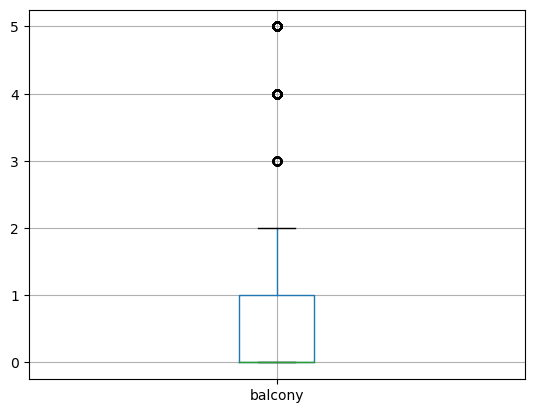

In [57]:
data.boxplot('balcony')
plt.show()

Что и требовалось доказать, наибольшее количество без балковнов. Один или два балкона в среднем имееют одинаковое количество. Свыше 3-х балконов встречается редко, поэтому удалим все квартиры с 4 и более балконами

In [58]:
data.drop(index=data.query('balcony > 3').index,inplace=True)

Столбец days_exposition - сколько дней было размещено объявление. Данный столбец заполняется автоматически, при заполнеии формы продажи, поэтому нулевых или аномальных значений нет. Объявления которые висят более 3-х лет думаю имеет смысл удалить.

In [59]:
print('Объявление не было опубликовано: ',data.query('days_exposition == 0')['days_exposition'].count())

print('Объявлению больше 3 лет : ',data.query('days_exposition > 365*3')['days_exposition'].count())

data.drop(index=data.query('days_exposition > 365*3').index,inplace=True)

Объявление не было опубликовано:  3028
Объявлению больше 3 лет :  160


Строим гистограмму по столбцу days_exposition

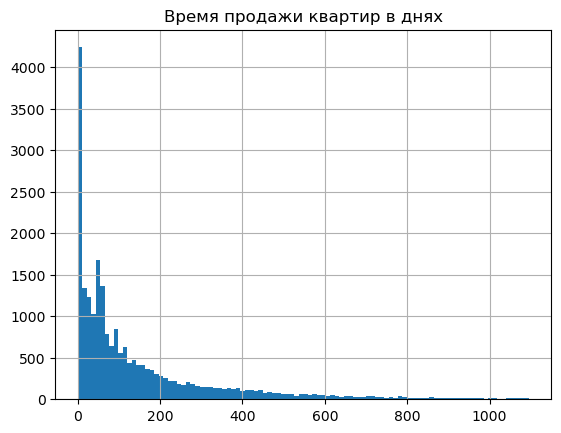

In [60]:
data['days_exposition'].hist(bins=100);
plt.title("Время продажи квартир в днях")
plt.show()

Столбцы airports_nearest, city_centers_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest заполнены автоматически. Единственно выделяется квартира очень близко к аэропорту. Ее думаю стоит удалить.

In [61]:
print('Квартир слишком близко к аэропорту:',data.query('airports_nearest < 5000')['airports_nearest'].count())
data.drop(index=data.query('airports_nearest < 5000').index,inplace=True)

Квартир слишком близко к аэропорту: 1


Cбросим индексацию после удаления строк.

In [62]:
data.reset_index(inplace=True, drop=True)

Проверим изменные показатели в датасете. Минимальные и максимальные показатели в выбранных параметрах о продаже квартир.

In [63]:
(data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floor', 'floors_total']].apply (['count', 'min', 'max'])   .style.format("{:,.2f}"))

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,628.00","22,628.00","13,762.00","22,628.00","22,628.00","20,825.00","20,460.00","22,628.00","22,628.00"
min,0.00,12.00,2.50,0.00,"430,000.00",10.00,2.00,1.00,1.00
max,7.00,400.00,4.00,"1,095.00","99,000,000.00",200.00,50.00,27.00,29.00


В целом мы добились того о чем я писал выше. Фильтры сработали.

Сделаем сводную таблицу по количеству квартир на этажах.

In [64]:
data.rooms.value_counts()

1    7874
2    7630
3    5426
4    1088
5     286
0     189
6      93
7      42
Name: rooms, dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22628 non-null  int64         
 1   last_price            22628 non-null  int64         
 2   total_area            22628 non-null  float64       
 3   first_day_exposition  22628 non-null  datetime64[ns]
 4   rooms                 22628 non-null  int64         
 5   ceiling_height        13762 non-null  float64       
 6   floors_total          22628 non-null  int64         
 7   living_area           20825 non-null  float64       
 8   floor                 22628 non-null  int64         
 9   is_apartment          22628 non-null  bool          
 10  studio                22628 non-null  bool          
 11  open_plan             22628 non-null  bool          
 12  kitchen_area          20460 non-null  float64       
 13  balcony         

По итогам предобаботки было удалено 940 строк, что составляет 4 % от общих данных.

### Посчитайте и добавьте в таблицу новые столбцы

**Добавим столбец цена одного квадратного метра**

In [66]:
data['price_one_square_meter'] = (data['last_price']/data['total_area']).round(2)

Проверяем полученный столбец

In [67]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0,120370.37
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81,82920.79
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558,92785.71
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424,408176.10
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121,100000.00


Делаем расчеты по столбцу цена одного квадратного метра

In [68]:
print('Максимальная цена за 1 кв.м.:', data.price_one_square_meter.max())
print('Минимальная цена за 1 кв.м.:', data.price_one_square_meter.min())
print('Средняя цена за 1 кв.м.:', data.price_one_square_meter.mean())
print('Медианная цена за 1 кв.м.:', data.price_one_square_meter.median())

Максимальная цена за 1 кв.м.: 848484.85
Минимальная цена за 1 кв.м.: 7962.96
Средняя цена за 1 кв.м.: 97961.78745271346
Медианная цена за 1 кв.м.: 94696.97


**Добавляем столбец "день публикации объявления"**

In [69]:
data['day_publication'] = data['first_day_exposition'].dt.weekday

**Добавляем столбец "месяц публикации объявления"**

In [70]:
data['month_publication'] = data['first_day_exposition'].dt.month

**Добавляем столбец "год публикации объявления"**

In [71]:
data['years_publication'] = data['first_day_exposition'].dt.year

Проверяем полученные столбцы

In [72]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_publication,month_publication,years_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018


**Теперь добавляем столбец "тип этажа квартиры", первый, последний, другой.**

In [73]:
data.loc[data['floor'] == 1, 'floor_category'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'floor_category'] = 'последний'
data.loc[data['floor_category'].isna(), 'floor_category'] = 'другой'

In [74]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_publication,month_publication,years_publication,floor_category
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0,120370.37,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81,82920.79,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558,92785.71,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424,408176.10,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121,100000.00,1,6,2018,другой


Построим сводную по категориям этажа.

In [75]:
data['floor_category'].value_counts()

другой       16610
последний     3201
первый        2817
Name: floor_category, dtype: int64

Построим график распределения по категориям

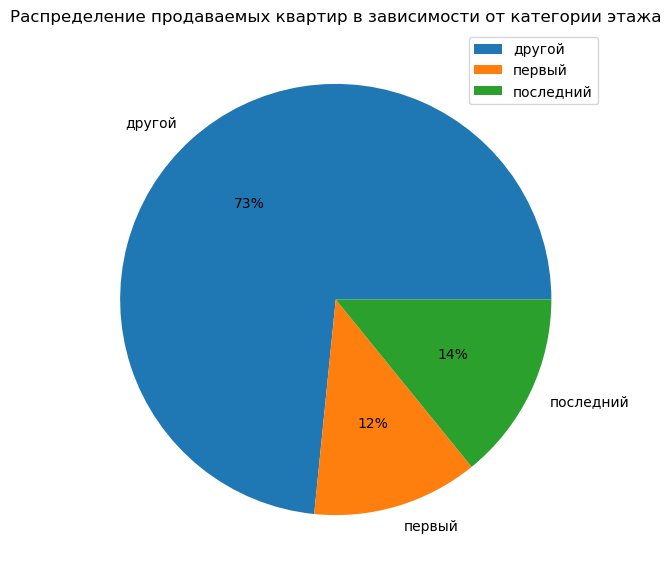

In [76]:
data.pivot_table(index='floor_category',values='last_price',aggfunc='count') \
  .plot.pie(y='last_price', figsize=(10,7), label='', autopct='%1.0f%%')
plt.title("Распределение продаваемых квартир в зависимости от категории этажа")
plt.show()

Как мы видим наибольшее количество квартир не на первом и на не последнем этажах. Что в принципе ожидаемо, т.к. этих квартир существенно больше. Тот факт что последних этажей больше чем первых, тоже можно объяснить. На первом этаже много квартир либо переведено в нежилой фонд, либо изначально застройщик первый этаж предусматривает для торговых помещений.

**Считаем расстояние до центра.**\
Создадим новый столбец. Для удобства расстояние переведем в километры, значения округлим до целых.

In [77]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest'] / 1000)
data['city_centers_nearest_km'] =  data['city_centers_nearest_km'].astype('Int32')

**Считаем расстояние до аэропорта.**\
Создадим новый столбец. Для удобства расстояние переведем в километры, значения округлим до целых.

In [78]:
data['airports_nearest_km'] = round(data['airports_nearest'] / 1000)
data['airports_nearest_km'] =  data['airports_nearest_km'].astype('Int32')

Проверяем полученную таблицу

In [79]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_publication,month_publication,years_publication,floor_category,city_centers_nearest_km,airports_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,0,120370.37,3,3,2019,другой,16,19
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,81,82920.79,1,12,2018,первый,19,13
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,2.0,574.0,558,92785.71,3,8,2015,другой,14,22
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,3.0,234.0,424,408176.10,4,7,2015,другой,7,28
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121,100000.00,1,6,2018,другой,8,32


### Проведите исследовательский анализ данных

Изучаем полученные параметры

In [80]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_publication,month_publication,years_publication,city_centers_nearest_km,airports_nearest_km
count,22628.000000,2.262800e+04,22628.000000,22628.000000,13762.000000,22628.000000,20825.000000,22628.000000,20460.000000,22628.000000,...,7623.000000,17285.00000,8599.000000,22628.000000,22628.000000,22628.000000,22628.000000,22628.000000,17284.0,17264.0
mean,9.848285,6.038552e+06,58.543886,2.034912,2.717582,10.634524,33.513761,5.835734,10.307674,0.509899,...,489.846386,0.75875,522.322130,148.309174,97961.787453,2.570311,6.401670,2017.388457,14.237271,28.80914
std,5.655581,5.880083e+06,29.718608,1.018944,0.253236,6.529790,19.134375,4.825219,5.068972,0.767045,...,339.067214,0.92885,277.404647,192.794255,41976.600694,1.787232,3.487638,1.018663,8.601296,12.676243
min,0.000000,4.300000e+05,12.000000,0.000000,2.500000,1.000000,10.000000,1.000000,2.000000,0.000000,...,1.000000,0.00000,13.000000,0.000000,7962.960000,0.000000,1.000000,2014.000000,0.0,6.0
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.500000,2.000000,7.000000,0.000000,...,288.000000,0.00000,299.000000,22.000000,76446.905000,1.000000,3.000000,2017.000000,9.0,18.0
50%,9.000000,4.590000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,454.000000,0.00000,507.000000,72.000000,94696.970000,3.000000,6.000000,2017.000000,13.0,27.0
75%,14.000000,6.600000e+06,68.000000,3.000000,2.800000,16.000000,42.000000,8.000000,11.800000,1.000000,...,612.000000,1.00000,733.000000,193.000000,113541.670000,4.000000,10.000000,2018.000000,16.0,37.0
max,50.000000,9.900000e+07,400.000000,7.000000,4.000000,29.000000,200.000000,27.000000,50.000000,3.000000,...,3190.000000,3.00000,1344.000000,1095.000000,848484.850000,6.000000,12.000000,2019.000000,66.0,85.0


Теперь построим гистограммы для каждого параметра таблицы

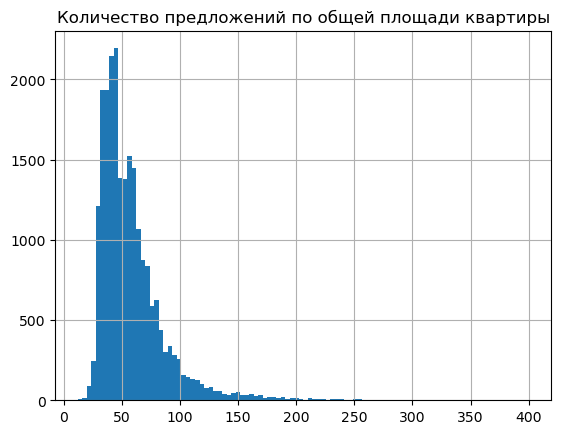

In [81]:
data['total_area'].hist(bins=100)
plt.title("Количество предложений по общей площади квартиры")
plt.show()

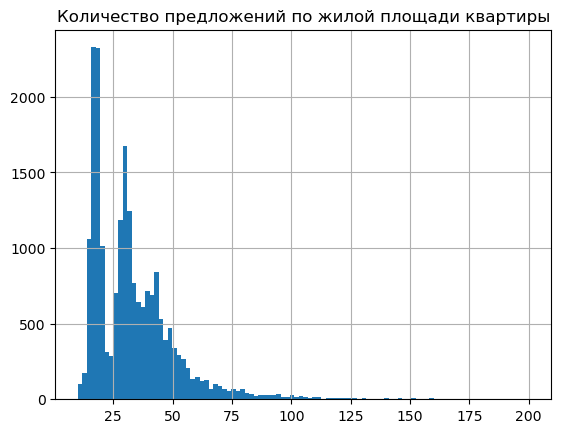

In [82]:
data['living_area'].hist(bins=100);
plt.title("Количество предложений по жилой площади квартиры")
plt.show()

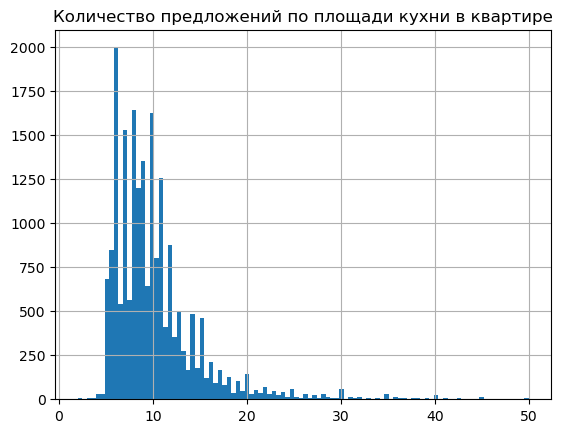

In [83]:
data['kitchen_area'].hist(bins=100);
plt.title("Количество предложений по площади кухни в квартире")
plt.show()

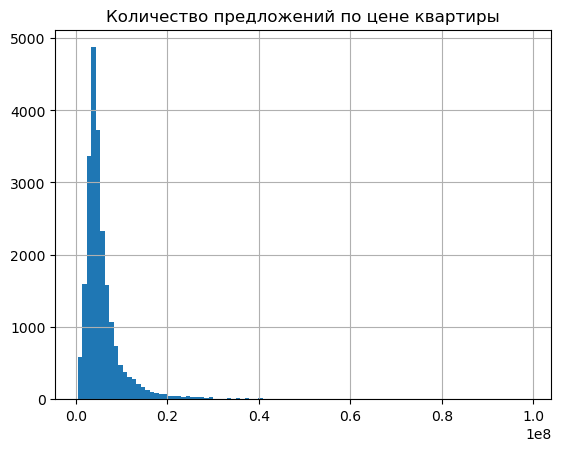

In [84]:
data['last_price'].hist(bins=100);
plt.title("Количество предложений по цене квартиры")
plt.show()

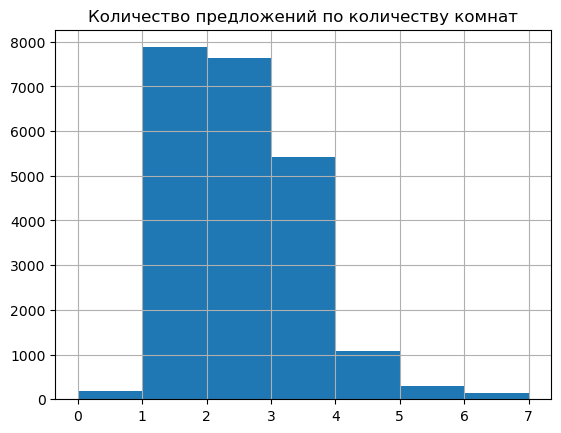

In [85]:
data['rooms'].hist(bins=data['rooms'].max());
plt.title("Количество предложений по количеству комнат")
plt.show()

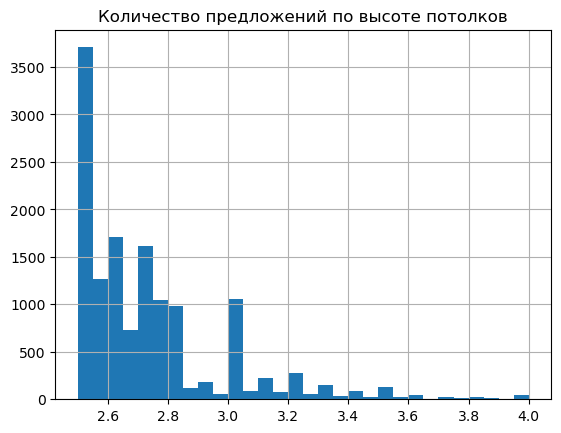

In [86]:
data['ceiling_height'].hist(bins=30);
plt.title("Количество предложений по высоте потолков")
plt.show()

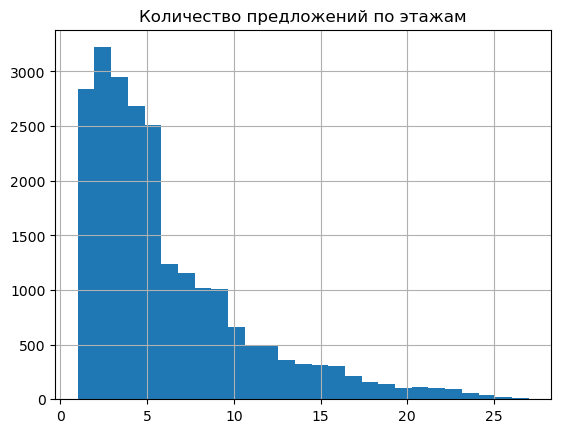

In [87]:
data['floor'].hist(bins=data['floor'].max());
plt.title("Количество предложений по этажам")
plt.show()

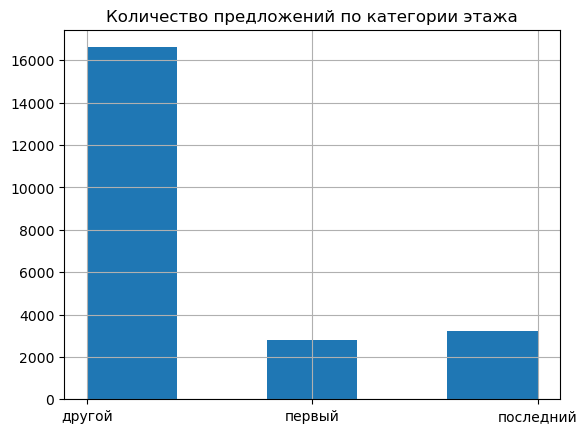

In [88]:
data['floor_category'].hist(bins=5);
plt.title("Количество предложений по категории этажа")
plt.show()

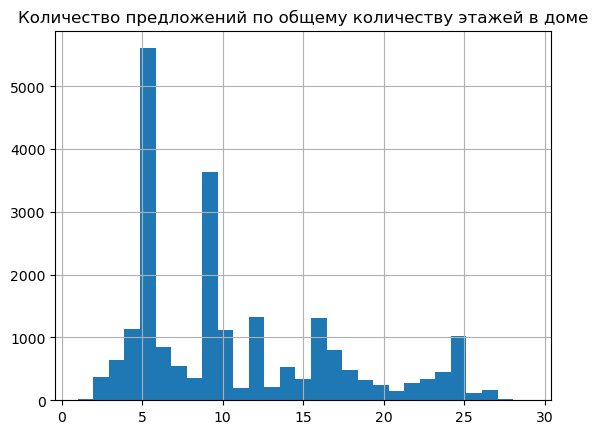

In [89]:
data['floors_total'].hist(bins=data['floors_total'].max());
plt.title("Количество предложений по общему количеству этажей в доме")
plt.show()

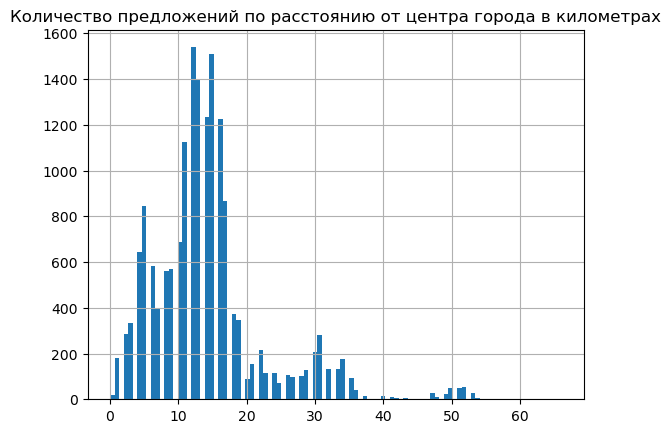

In [90]:
data['city_centers_nearest_km'].hist(bins=100);
plt.title("Количество предложений по расстоянию от центра города в километрах")
plt.show()

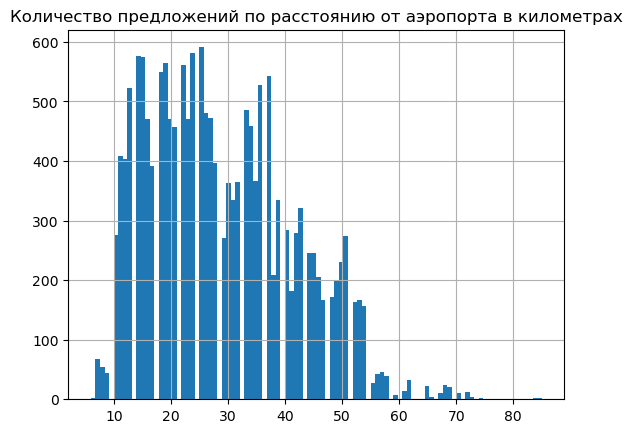

In [91]:
data['airports_nearest_km'].hist(bins=100);
plt.title("Количество предложений по расстоянию от аэропорта в километрах")
plt.show()

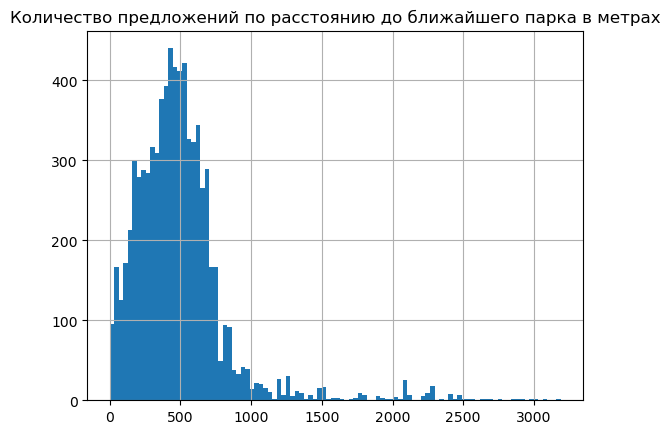

In [92]:
data['parks_nearest'].hist(bins=100);
plt.title("Количество предложений по расстоянию до ближайшего парка в метрах")
plt.show()

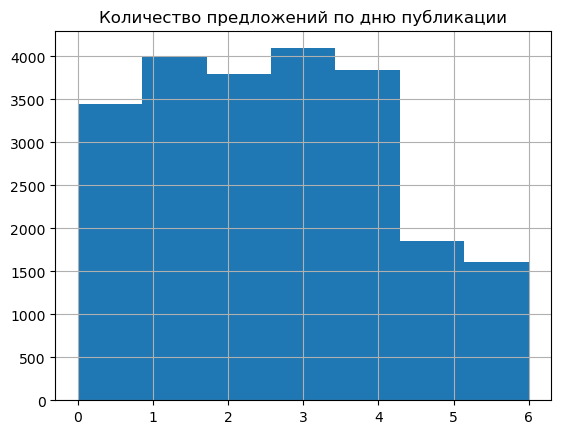

In [93]:
data['day_publication'].hist(bins=7);
plt.title("Количество предложений по дню публикации")
plt.show()

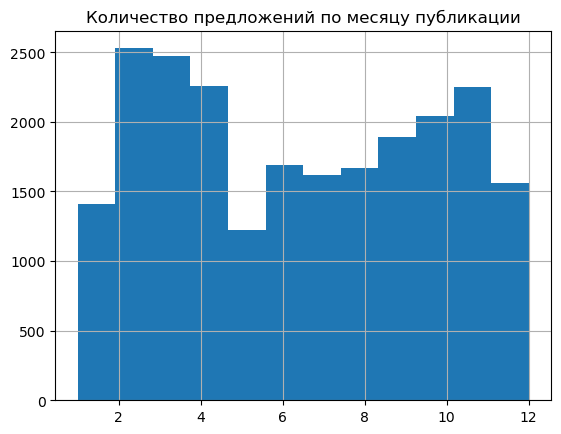

In [94]:
data['month_publication'].hist(bins=12);
plt.title("Количество предложений по месяцу публикации")
plt.show()

# Построили гистограммы для:

1. Общая площадь. Наблюдаем очень малое количество квартир с общей площадью более 100 кв.м. Вероятнее всего это элитная недвижимость.
1. Жилая площадь. Наблюдаем два пика - на 18 кв.м. и на 30 кв.м. Я думаю это просто объяснить. Наибольшее количество объявлений это одно и двухкомнатные квартиры, где жилая площадь у стандартных квартир примерно 18 и 30 кв. м. соответвенно.
1. Площадь кухни. Наблюдаем также средние размеры кухни от 5 до 13 кв. м. Что тоже является типовым на рынке.
1. Цена объекта. Данный график наглядно показывает, что наибольшее количество квартир в диапазоне до 20 млн. руб. Он имеет длинный хвост, что свидельствует о наличии на рынке элитных квартир.
1. Количество комнат. Больше всего одно- и двух-комнатных квартир. Что подтверждает гипотезы выше. Также имеется большое количество трехкомнатных квартир, и есть предложения более трех комнат.
1. Высота потолков. Здесь наибольший пик 2.5м вероятно из-за какого-то старого СНИПа. Но разброс идет от 2,5 до 3,6 м. что логично.
1. Этаж квартиры. Наибольшее количество квартир с 1 по 6 этаж. Все оченнь логично, т.к в СССР застройка велась 5 и 9 этажными домами. Как мы видим по графику после 10 этажа идет сильный спад предложения.
1. Тип этажа квартиры («первый», «последний», «другой»).Больше всего квартир на "другом" этаже, первых и последних этажей одинакого мало. Но первых поменьше, т.к. на певом этаже могут быть нежилые помещения, и во многих домах 1 этаж сделан под торговые объекты.
1. Общее количество этажей в доме.Видим явные пики: 5-этажная застройка, 9-этажная застройка. Что уже описывалось ранее, также видим пики на 12, 16 и 24 этажных домах. Что тоже объясняется современной типовой застройкой.
1. Расстояние до центра города в километрах. Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км. Но большинство предложений в растоянии 55 км от центра города.
1. Расстояние до ближайшего аэропорта. Здесь видим довольно "шумный" график. Но это вполне нормально, т.к. населенные пункты не находятся рядом, и межде ними есть растояние, которое и показано на графиках провалами.
1. Расстояние до ближайшего парка. Судя по графику больше всего квартир с парками на расстоянии до 1 км.
1. День и месяц публикации объявления. Видим провал в публикации объявлений в субботу и воскресенье, что логично. Смею заметить, что в воскресенье вообще не публикуются объявления. Так же видим что с февраля по апрель наблюдалосась повышенная активность. Так же был плавный рост активности с июля по ноябрь. Провалы в декабре, январе и мае.

**Изучим, как быстро продавались квартиры (столбец days_exposition).**

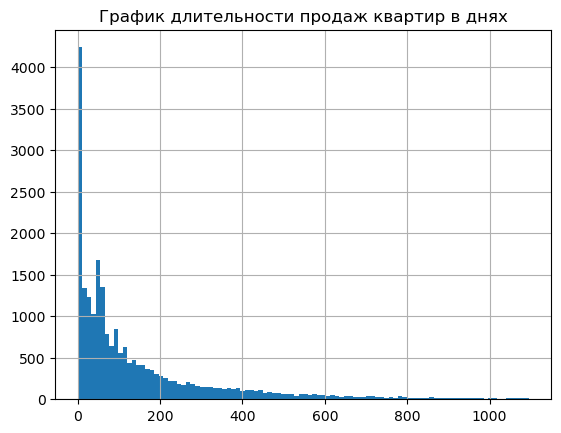

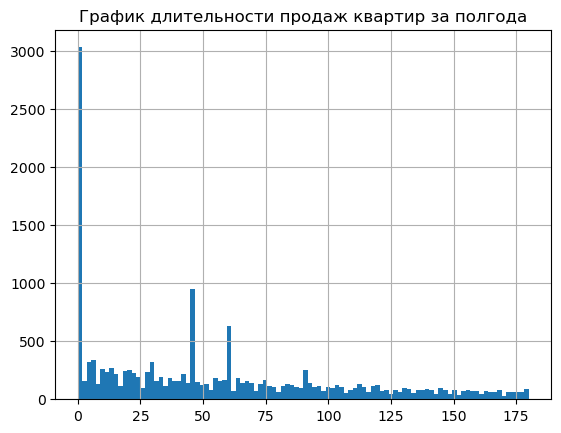

In [95]:
data.hist('days_exposition', bins=100);
plt.title("График длительности продаж квартир в днях")
plt.show()
data.hist('days_exposition', bins=100, range = (0,180));
plt.title("График длительности продаж квартир за полгода")
plt.show()

Рассмотрим время продажи квартиры в днях

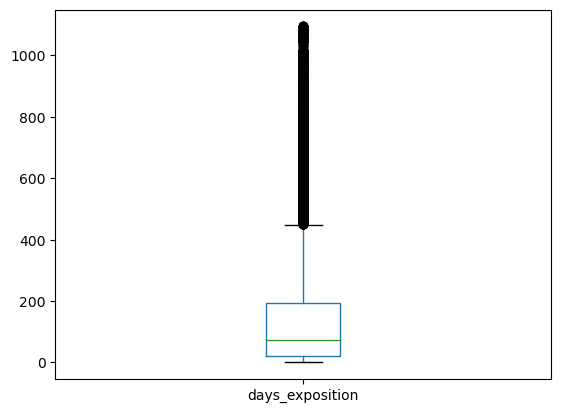

In [96]:
data.boxplot(column=['days_exposition'], grid= False)
plt.show()

In [97]:
data['days_exposition'].describe()

count    22628.000000
mean       148.309174
std        192.794255
min          0.000000
25%         22.000000
50%         72.000000
75%        193.000000
max       1095.000000
Name: days_exposition, dtype: float64

Средний период продажи квартир 171 день. Быстрыми продажами нужно считать продажи до 44 дней включительно, половина квартир продается за 93 дня. Необычно долгими считать продажи более 224 дней.

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22628 entries, 0 to 22627
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             22628 non-null  int64         
 1   last_price               22628 non-null  int64         
 2   total_area               22628 non-null  float64       
 3   first_day_exposition     22628 non-null  datetime64[ns]
 4   rooms                    22628 non-null  int64         
 5   ceiling_height           13762 non-null  float64       
 6   floors_total             22628 non-null  int64         
 7   living_area              20825 non-null  float64       
 8   floor                    22628 non-null  int64         
 9   is_apartment             22628 non-null  bool          
 10  studio                   22628 non-null  bool          
 11  open_plan                22628 non-null  bool          
 12  kitchen_area             20460 n

**Строим матрицу зависимостей.**

In [99]:
cols_numeric = ['last_price', 'total_area', 'living_area', 'kitchen_area']

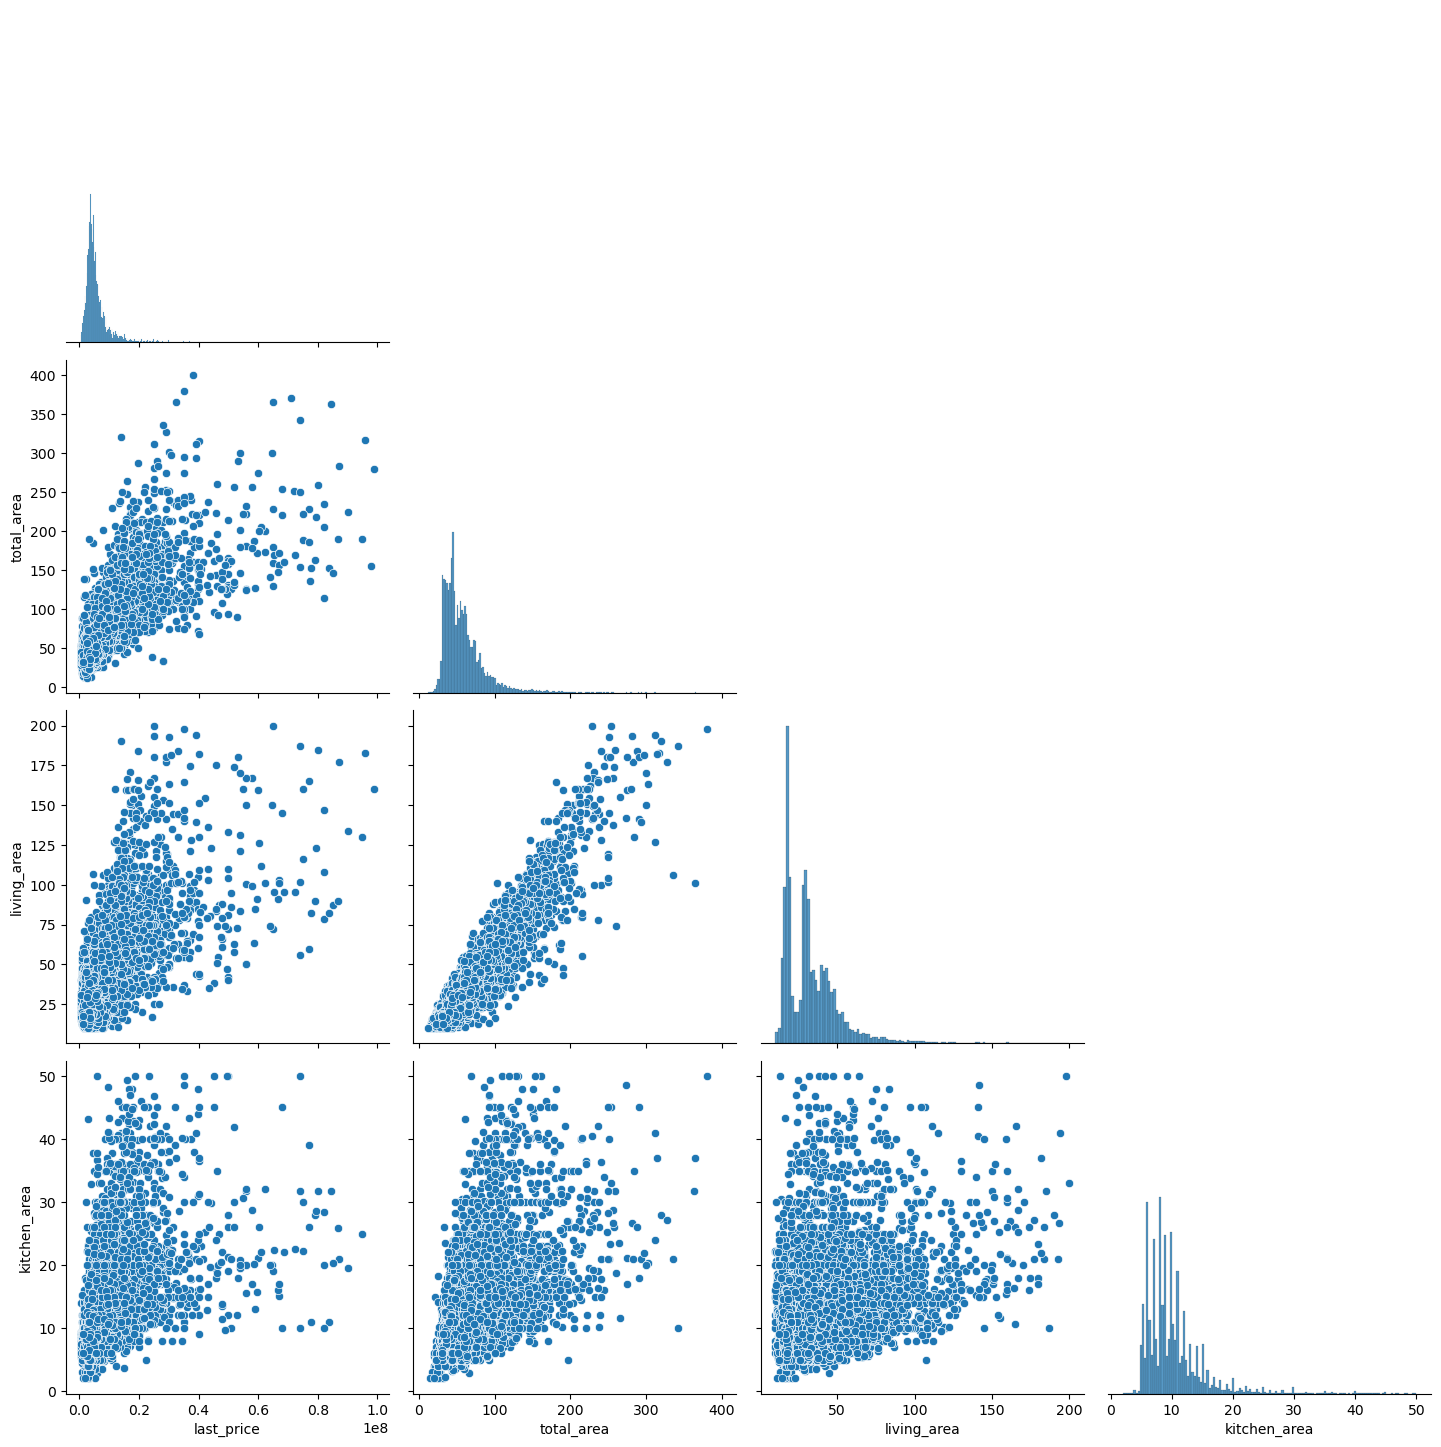

In [100]:
df = data[cols_numeric]
g = sns.pairplot(df, corner=True)
g.fig.set_size_inches(15, 15)

Построим сразу таблицу зависимости

In [101]:
df.corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.755421,0.666096,0.558732
total_area,0.755421,1.000000,0.934393,0.581600
living_area,0.666096,0.934393,1.000000,0.376324
kitchen_area,0.558732,0.581600,0.376324,1.000000


Построена матрица зависимости цены от следующих факторов:

        - общей площади. Видна прямая зависимость цены от площади квартиры. Чем больше площадь, тем выше цена.
        
        - жилой площади. Жилая площадь напрямую зависит от общей площади, что дает пряму корреляцию. 
        
        - площади кухни. Аналогично с пунктом выше.
        
        - количество комнат. Также видим увеличение стоимости с увеличением комнат, но зависимость более смазана.


Посмотрим как категория этажа влияет на стоимость квартиры

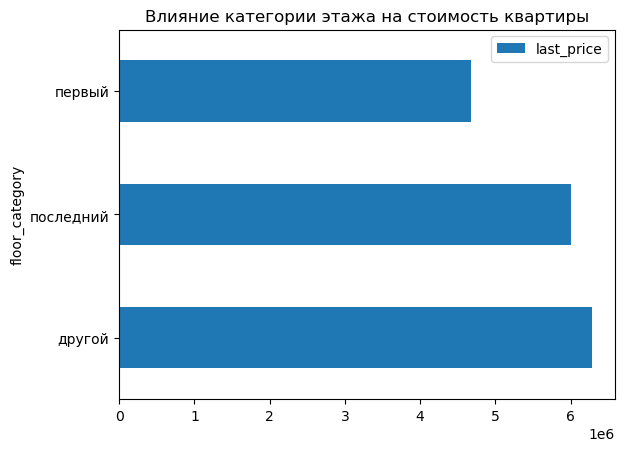

In [102]:
data.pivot_table(index='floor_category',values='last_price').sort_values('last_price', ascending = False).plot(y='last_price', kind='barh');
plt.title("Влияние категории этажа на стоимость квартиры")
plt.show()

Как мы видим наименьшая стоимость у квартир на 1 этаже, на остальных этажах стоимость примерно одинаковая. Я думаю это больше связано с тем, что люди не особо хотят жить на 1 этаже, холодно из подвала, может быть запах канализации, через 1 этаж заходят все жители, следовательно и грязно и шумно.

Рассмотрим в какие дни недели и по какой цене продаются квартиры, для этого построим медиану и среднюю.

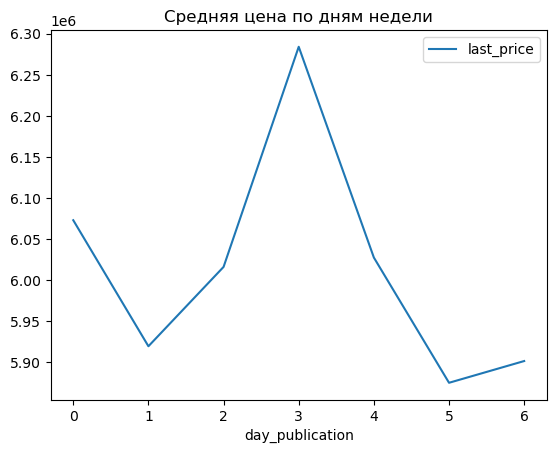

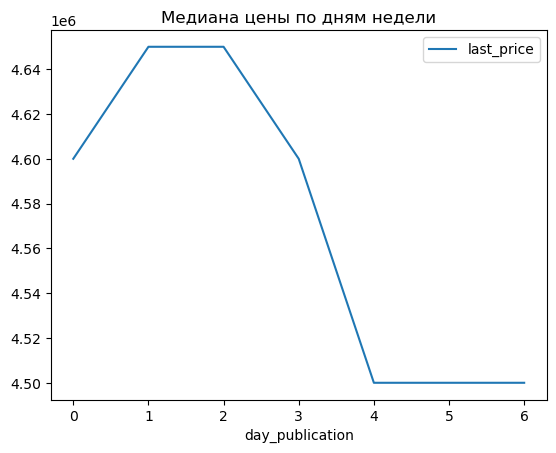

In [103]:
data.pivot_table(index='day_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
plt.title("Средняя цена по дням недели")
plt.show()
data.pivot_table(index='day_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
plt.title("Медиана цены по дням недели")
plt.show()

Наивысшая цена на объявления публикуемые в начале недели, во второй половине недели средняя и медиальые цены снижаются. Это можно объяснить количеством объявлений. Выше описывалось, что в начале недели наибольшее количество объявлений.

Рассмотрим в какие месяцы и по какой цене продаются квартиры, для этого построим медиану и среднюю.

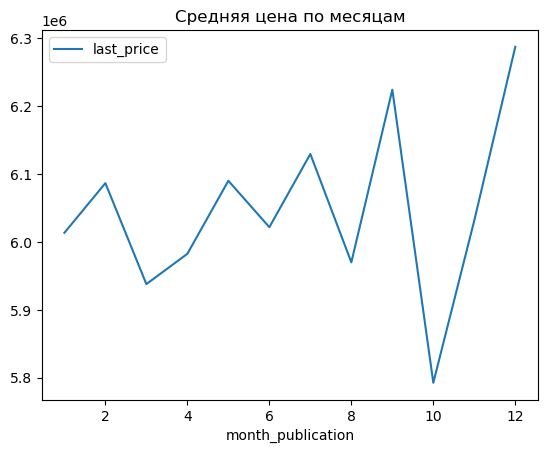

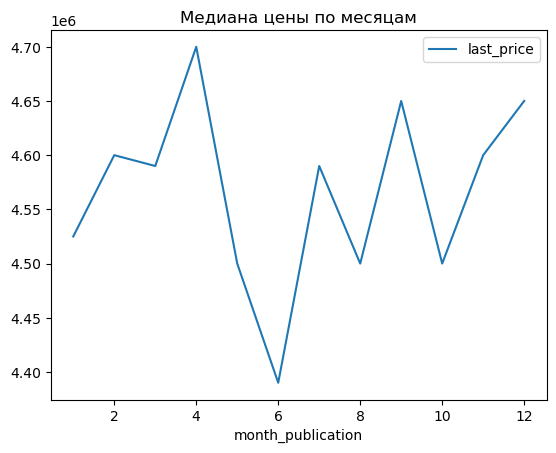

In [104]:
data.pivot_table(index='month_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
plt.title("Средняя цена по месяцам")
plt.show()
data.pivot_table(index='month_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
plt.title("Медиана цены по месяцам")
plt.show()

По графикам мы видим , что наиболее низкая цена в такие месяцы как июнь, август и октябрь. Пики же цены в апреле, июле, сентябре и декабре. 

Рассмотрим в какие годы и по какой цене продаются квартиры, для этого построим медиану и среднюю.

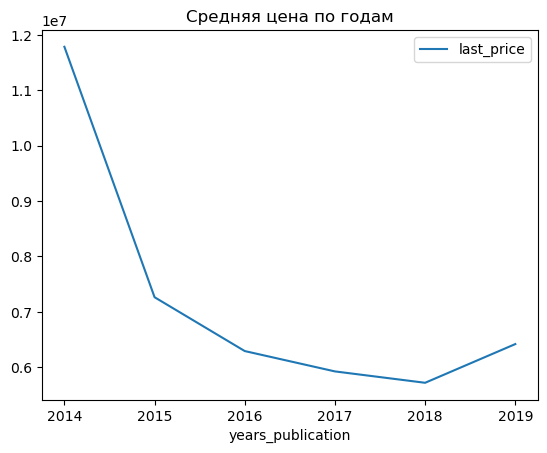

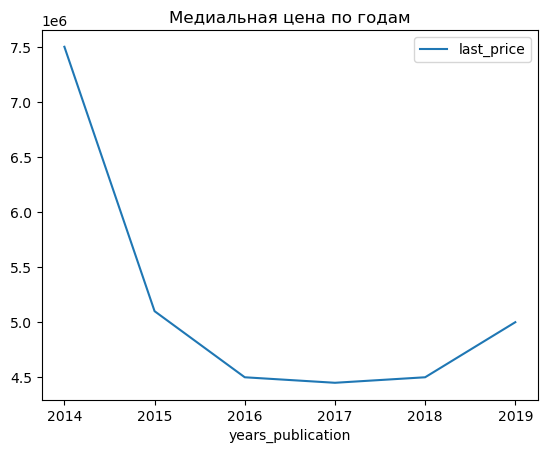

In [105]:
data.pivot_table(index='years_publication',values='last_price',aggfunc='mean').plot(y='last_price', kind='line', title='mean');
plt.title("Средняя цена по годам")
plt.show()
data.pivot_table(index='years_publication',values='last_price',aggfunc='median').plot(y='last_price', kind='line', title='median');
plt.title("Медиальная цена по годам")
plt.show()

Как мы видим цена на квартиры с 2014 года снижалась до 2018 года, после 2018 года цена стала расти.

**Рассчитаем среднюю стоимость 1 кв. м. в топ 10 населенных пунктах по количеству объявлений.**


In [106]:
median_price_one_sqm = data.pivot_table(index='locality_name', values='price_one_square_meter', aggfunc=['count', 'median'])
median_price_one_sqm.columns = ['count', 'median']
median_price_one_sqm.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,14956,104385.960
поселок мурино,536,86171.495
поселок шушары,428,76986.130
всеволожск,382,65789.470
пушкин,350,99725.495
колпино,326,74562.810
поселок парголово,325,91642.860
гатчина,296,67671.510
деревня кудрово,293,92000.000


array([[<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'median'}>]], dtype=object)

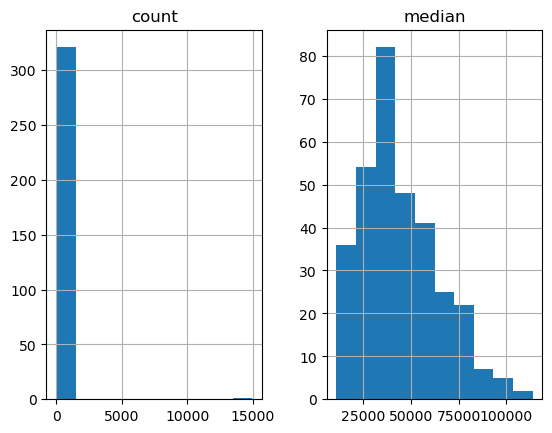

In [107]:
median_price_one_sqm.hist()

Посмотрим в каких населенных пунктах наибольшая стоимость 1 квадратного метра.

In [108]:
median_price_one_sqm.sort_values('median', ascending=False).head(10)

,count,median
locality_name,,
поселок лисий нос,2,113728.350
санкт-петербург,14956,104385.960
зеленогорск,24,101666.665
кудрово,168,100000.000
сестрорецк,176,99838.145
пушкин,350,99725.495
поселок левашово,1,96997.690
деревня кудрово,293,92000.000
поселок парголово,325,91642.860


Посмотрим в каких населенных пунктах наименьшая стоимость 1 квадратного метра.

In [109]:
median_price_one_sqm.sort_values('median', ascending=False).tail(10)

,count,median
locality_name,,
поселок житково,2,14956.275
деревня ям-тесово,2,13711.555
деревня сижно,1,13709.680
поселок тесово-4,1,12931.030
деревня малая романовка,1,12724.550
поселок совхозный,2,12629.130
деревня выскатка,2,12335.480
деревня вахнова кара,1,11688.310
поселок станции свирь,2,11481.480


Здесь как мы видим наибольшее количество объявлений, как собственно и средняя цена за квадратый метр в г. Санкт-Петербург, Более 15 тыс. обьявлений иоколо 104 тыс. руб, затем идет поселок Кудрино 540 объявлений с ценой 86 тыс. руб за кв. метр, и поселок Шушары 429 объявлений с ценой 77 тыс. руб за кв. метр. Замыкает топ 10 город Выборг с ценой менее 60 тыс. руб. за кв. метр. Что и ожидалось самая маленькая стоимость квадрадного метра в в деревнях с небольшим населением, и находяцими на довольно большом расстоянии от Санкт-Петербурга. Лидером по самой низкой цене является деревня Старополье, расположенная в 45 км. от Санкт-Петербурга и в 50 км от ближайшей ЖД станции.

**Считам как влияет на цену растояние до центра Санкт-Петербурга.**

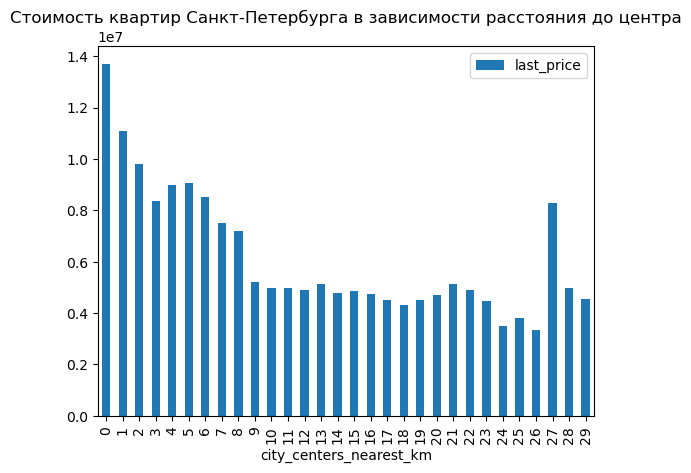

In [110]:
data[data['locality_name']=='санкт-петербург'].pivot_table(index='city_centers_nearest_km', values='last_price', aggfunc='median').plot(kind='bar')
plt.title("Стоимость квартир Санкт-Петербурга в зависимости расстояния до центра")
plt.show()

    С наибольшим отрывом лидирует цена не недвижимость в центре города с расстоянием до 1 км. Я думаю это в любом городе такая зависимость, а в Санкт-Петербурге находится исторический центр, жилья мало и спрос намного превышает предложение. 

    Затем мы видим небольшое падение цены от 1 до 4 км. и рост от 4 до 7 км. Что вероятно связано с географией расположения населенных пунктов и районов Санкт-Петербурга.

    После 7 км. мы видим постепенный спад стоимости жилья.

    Однако в 27 км видим резкий скачок стоимости квадратного метра жилья. Согласно поиску яндекса там находится Зеленогорск, с элитным жильем.

### Общий вывод

***По результатам работы могу сделать следующие выводы:***
1. С наибольшим отрывом лидирует цена не недвижимость в центре города с расстоянием до 1 км. Я думаю это в любом городе такая зависимость, а в Санкт-Петербурге находится исторический центр, жилья мало и спрос намного превышает предложение. Затем мы видим небольшое падение цены от 1 до 4 км. и рост от 4 до 7 км. Что вероятно связано с географией расположения населенных пунктов и районов Санкт-Петербурга. После 7 км. мы видим постепенный спад стоимости жилья. Однако в 27 км видим резкий скачок стоимости квадратного метра жилья. Согласно поиску яндекса там находится Зеленогорск, с элитным жильем.
1. Наибольшая средняя цена за квадратый метр в г. Санкт-Петербург, около 120 тыс. руб, затем идет город Пушкин с ценой 100 тыс. руб за кв. метр, и деревня Кудрово с ценой 90 тыс. руб за кв. метр. Замыкает топ 10 город Выборг с ценой менее 60 тыс. руб. за кв. метр.
1. Наибольшее количество квартир в диапазоне до 20 млн. руб. Он имеет длинный хвост, что свидельствует о наличии на рынке элитных квартир.
1. Существует прямая зависимость цены от площади квартиры. Чем больше площадь, тем выше цена. Соответвенно и жилая площадь и площадь кухни также влияют на рост цены.
1. Количество комнат не сильно влияет на стоимость квартиры. Думаю это связано больше с общей площадью.
1. Цена никак не зависит от даты публикации объявлений, наиболее редко выставляют объявления в выходные дни. Также замечена закономерность уменьшения количества объявлений в такие месяцы как май, декабрь и январь, что объясняется большим количество м выходных дней и праздников, этот фактор я считаю чисто человеческий.
1. Средний период продажи квартир 171 день, при этом наибольшее количество снятых объявлений на 45 день, или на 60. Что можно объяснить истекшим сроком размещения объявления на площадке. Медиальное значение продажи составило 93 дня. Быстрой продажей думаю следует считать продажи не менее 60 дней, т.к. процедура продажи тоже занимает время.
1. Наибольшее количество квартир на рынке с 1 по 6 этаж. Все очень логично, т.к в СССР застройка велась 5 и 9 этажными домами. Как мы видим по графику после 10 этажа идет сильный спад предложений.
1. Высота потолков также не сильно влияет на цену недвижимости. Здесь наибольший пик 2.5м вероятно из-за какого-то старого СНИПа. Но разброс идет от 2,5 до 3,6 м. что по современным стандартам является нормой.
1. Больше всего квартир находятся со 2 этажа по предпоследний, первых и последних этажей одинакого мало. Но первых поменьше, т.к. на певом этаже могут быть нежилые помещения, и во многих домах 1 этаж сделан под торговые объекты.
1. Расстояние до центра города в километрах. Здесь наблюдаем два пика, один маленький, 5км и другой побльшой от 10 км. до 15 км. Так же есть совсем небольшие всплески на 30 км. и 50 км. Но большинство предложений в растоянии 55 км от центра города.
1. Расстояние до ближайшего аэропорта. Здесь видим довольно "шумный" график. Но это вполне нормально, т.к. населенные пункты не находятся рядом, и межде ними есть растояние, которое и показано на графиках провалами.
1. Расстояние до ближайшего парка больше всего квартир с парками на расстоянии до 1 км.

В целом по предоставленным данным могу сказать следующее:
 - Много пропусков значений. В данном случае удалось заполнить некоторые данные, такие как балконы (было посчитатано в пропусках, что балконов нет), тип аппартаменты (было поставлено значение False) и количество комнат где площадь квартиры равнялась жилой площади мы поставли что это студия.
 - Имеются предложения с элитным жильем, что на наших данных выглядит как выбросы. Данные предложения пришлось удалить, т.к. они влияют на среднюю и на графиках выглядят как выбросы.
 - Есть некоректно заполненные данные. Например высота потолков, Была одна квартира с высотой 100 м. (Самый высокий ангар в мире составляет 107 м.), что на мой взгляд явный выброс. Также была пропущена запятая при заполнении данных и высота в нектороых квартирах составляла от 25 до 36 м.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [X]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [X]  определены пропущенные значения
- [X]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [X]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [X]  построены гистограммы для каждого параметра
- [X]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [X]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [X]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [X]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [X]  в каждом этапе есть промежуточные выводы
- [X]  есть общий вывод